In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from nn import Net

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

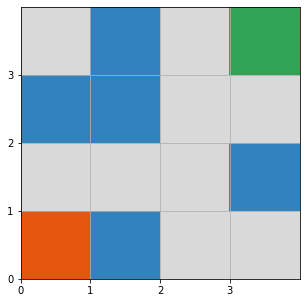

In [3]:
deterministic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=300,
    full_state=False,
)

In [4]:
target_net = Net(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

policy_net = Net(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

dqn = DQN(
    env=deterministic_env,
    env_type='vector',
    log_freq=100,
    train_freq=3,
    batch_size=50,
    w_sync_freq=10,
    memory_size=5000,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=2000,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01),
    load_pretrained=True,
    model_path='../models/dqn_nn',
)

dqn.run()

Episode: 0, Reward: -1013.8500000000018, Loss: 0
Episode: 100, Reward: -1508.7499999999957, Loss: 4894.02783203125
Episode: 200, Reward: -562.3000000000026, Loss: 1246.86474609375
Episode: 300, Reward: -26.05, Loss: 52.20476150512695
Episode: 400, Reward: -266.74999999999903, Loss: 1687.8026123046875
Episode: 500, Reward: -25.150000000000002, Loss: 32.75339889526367
Episode: 600, Reward: -66.00000000000003, Loss: 200.4088592529297
Episode: 700, Reward: -13.150000000000002, Loss: 220.16680908203125
Episode: 800, Reward: 4.75, Loss: 40.99968719482422
Episode: 900, Reward: 4.75, Loss: 37.352664947509766
Episode: 1000, Reward: -11.900000000000002, Loss: 62.8021240234375
Episode: 1100, Reward: 4.75, Loss: 48.58930587768555
Episode: 1200, Reward: -40.099999999999994, Loss: 41.53205871582031
Episode: 1300, Reward: -52.400000000000006, Loss: 437.3955383300781
Episode: 1400, Reward: 4.75, Loss: 4.234725475311279
Episode: 1500, Reward: 4.75, Loss: 10.049219131469727
Episode: 1600, Reward: 4.75, 

In [5]:
_, action_seq = dqn.evaluate_one_episode()
dqn.env.animate(action_seq=action_seq, filename='dqn.mp4')
Video('dqn.mp4')

In [6]:
dqn.evaluate()

#### Training

Text(0.5, 1.0, 'Epsilon decay per episode')

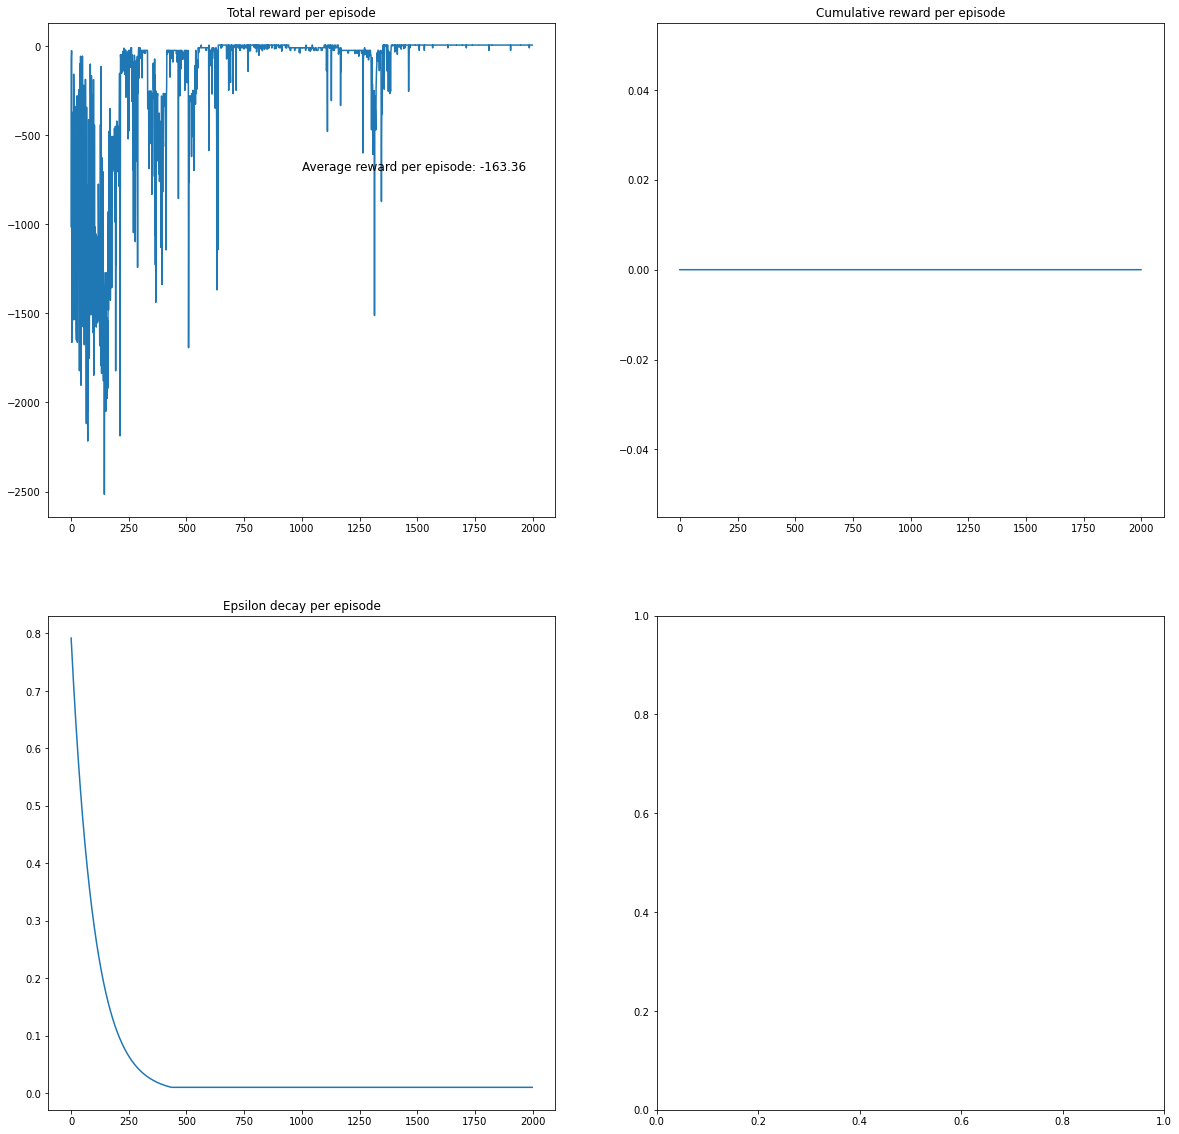

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

#### Evaluation

Text(0.5, 1.0, 'Cumulative reward per episode')

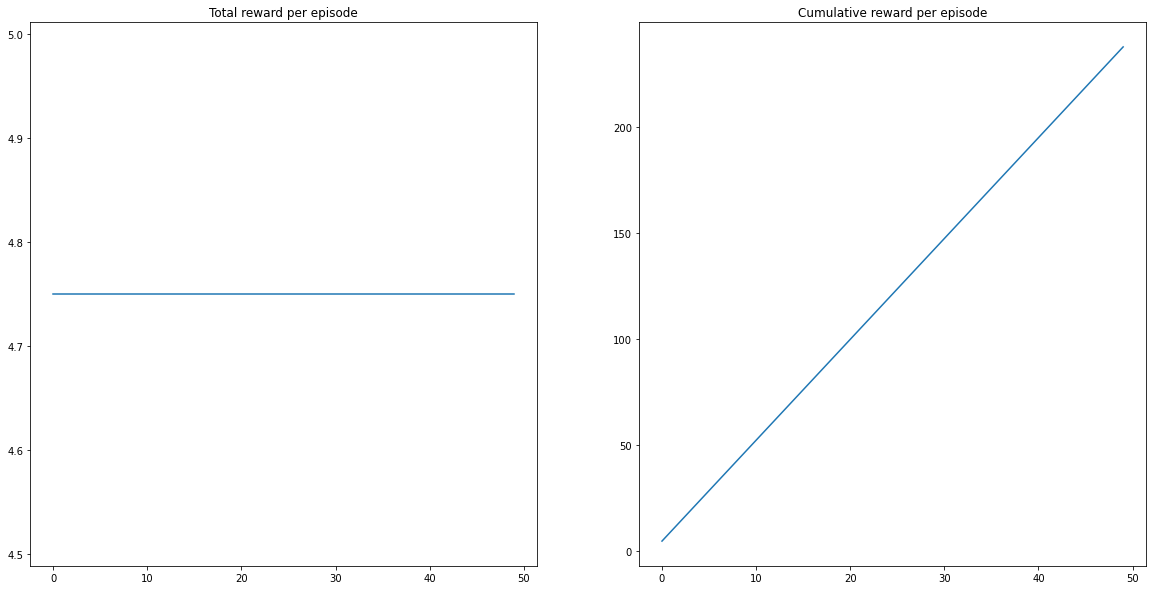

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(range(dqn.eval_episodes), [log['reward'] for _, log in dqn.eval_logs.items()])
ax[0].set_title('Total reward per episode')

ax[1].plot(range(dqn.eval_episodes), [log['cumulative_reward'] for _, log in dqn.eval_logs.items()])
ax[1].set_title('Cumulative reward per episode')